In [1]:
# now doing some numpy and looking at some
# -----------------------------------------------------------------------------------------------------------------

## NUMPY
import numpy as np
list_of_numbers = [1, 1, 2, 3, 5]
arr1 = np.array(list_of_numbers)
print(arr1)

print("The shape of the array is", arr1.shape)
print("The dtype of the array is", arr1.dtype)
print("The size of each item is", arr1.itemsize)
print("The strides of the array is", arr1.strides)

[1 1 2 3 5]
The shape of the array is (5,)
The dtype of the array is int64
The size of each item is 8
The strides of the array is (8,)


In [2]:
list_of_lists = [[1,1,2,3,5], [8,13,21,34,55]]
arr2 = np.array(list_of_lists)
print(arr2)
print("The shape of this array is", arr2.shape)
print("The dtype of this array is", arr2.dtype)
print("The size of each item is", arr2.itemsize)
print("The strides of this array are", arr2.strides)

[[ 1  1  2  3  5]
 [ 8 13 21 34 55]]
The shape of this array is (2, 5)
The dtype of this array is int64
The size of each item is 8
The strides of this array are (40, 8)


In [ ]:
# now looking at some neuroimaging data 
# -----------------------------------------------------------------------------------------------------------------

In [3]:
from ndslib import load_data
bold = load_data("bold_numpy", fname="bold.npy")
print("The shape of the data is", bold.shape)
print("The dtype of the data is", bold.dtype)
print("The itemsize of the data is", bold.itemsize)
print("The strides of the data is", bold.strides)

The shape of the data is (64, 64, 25, 180)
The dtype of the data is float64
The itemsize of the data is 8
The strides of the data is (8, 512, 32768, 819200)


In [7]:
# single voxel, single time point
bold[5,5,20,20]

6.0

In [9]:
# single voxel, all time points 
bold[32, 32, 12]

array([1080., 1052., 1056., 1087., 1146., 1147., 1105., 1064., 1128.,
       1089., 1095., 1049., 1109., 1051., 1074., 1073., 1112., 1086.,
       1090., 1062., 1086., 1023., 1047., 1139., 1065., 1117., 1070.,
       1070., 1089., 1074., 1051., 1034., 1096., 1060., 1096., 1076.,
       1032., 1067., 1030., 1072., 1056., 1069., 1061., 1054., 1072.,
       1072., 1035., 1018., 1116., 1056., 1051., 1084., 1075., 1080.,
       1036., 1022., 1076., 1060., 1031., 1079., 1048., 1002., 1055.,
       1027., 1014., 1006., 1072., 1003., 1026., 1039., 1096., 1078.,
       1025., 1029., 1009., 1065., 1023., 1098., 1045., 1094., 1016.,
       1015., 1027., 1020., 1030., 1049., 1034., 1053., 1018., 1038.,
       1072., 1020., 1007., 1037., 1082., 1050., 1011., 1027.,  972.,
        992.,  984., 1021., 1018., 1029., 1063., 1070., 1033., 1048.,
       1052., 1040., 1007.,  996., 1026., 1011., 1023.,  958.,  982.,
       1008., 1059., 1006., 1012., 1042., 1000., 1066., 1026., 1032.,
       1009., 1022.,

In [8]:
# all z coordinates for a given time points at x=32, y=32 voxel
bold[32, 32, :, 12]

array([  25.,   77.,  157.,  380.,   71.,  322.,  465.,  778.,  580.,
        593.,  373.,  906., 1109.,  464.,  446.,  506.,  536.,  508.,
        421.,  351.,  388.,  371.,  347.,  156.,   23.])

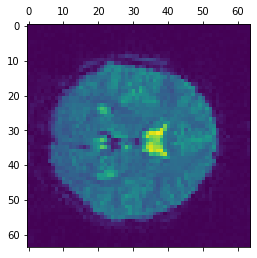

In [9]:
# z=10 slice, time point 0
import matplotlib.pyplot as mp
a = bold[:, :, 10, 0]
mp.matshow(a) 
mp.show()

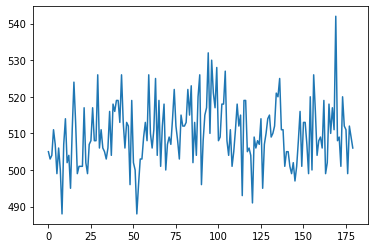

In [10]:
# time series at x/y/z 20/20/20
mp.plot(bold[20,20,20,:])

In [11]:
# -----------------------------------------------------------------------------------------------------------------
## SCIPY, some signal processing 
import scipy.signal as sps
resampled_bold = sps.resample(bold, 360, axis=3)
print(bold.shape)
print(resampled_bold.shape)

(64, 64, 25, 180)
(64, 64, 25, 360)


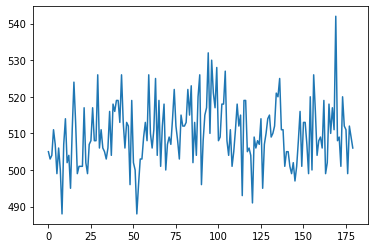

In [33]:
mp.plot(bold[20,20,20,:])

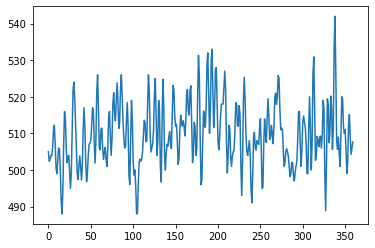

In [34]:
mp.plot(resampled_bold[20,20,20,:])

In [35]:
# -----------------------------------------------------------------------------------------------------------------
#PANDAS

import pandas as pd 
my_df = pd.DataFrame({  'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3']})

In [9]:
my_df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [36]:
subjects = pd.read_csv("https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv",
usecols=[1,2,3,4,5,6,7], na_values="NaN", index_col=0)

subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
subjectID,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0
subject_001,31,Male,NaN,129.0,58.0,74.0
subject_002,18,Female,NaN,130.0,63.0,70.0
subject_003,28,Male,Right,NaN,NaN,NaN
subject_004,29,Male,NaN,NaN,NaN,NaN


In [37]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, subject_000 to subject_076
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         77 non-null     int64  
 1   Gender      76 non-null     object 
 2   Handedness  66 non-null     object 
 3   IQ          63 non-null     float64
 4   IQ_Matrix   63 non-null     float64
 5   IQ_Vocab    63 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 4.2+ KB


In [38]:
subjects.describe()

,Age,IQ,IQ_Matrix,IQ_Vocab
count,77.000000,63.000000,63.000000,63.000000
mean,18.961039,122.142857,60.539683,64.015873
std,12.246849,12.717599,7.448372,8.125015
min,6.000000,92.000000,41.000000,36.000000
25%,9.000000,114.000000,57.000000,60.000000
50%,14.000000,122.000000,61.000000,64.000000
75%,28.000000,130.000000,64.500000,70.000000
max,50.000000,151.000000,76.000000,80.000000


In [14]:
subjects.loc["subject_000"]

Age              20
Gender         Male
Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
IQ_Vocab       77.0
Name: subject_000, dtype: object

In [15]:
subjects.iloc[0]

Age              20
Gender         Male
Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
IQ_Vocab       77.0
Name: subject_000, dtype: object

In [16]:
subjects.iloc[0, 2:5]

Handedness      NaN
IQ            139.0
IQ_Matrix      65.0
Name: subject_000, dtype: object

In [17]:
subjects["Age"]

subjectID
subject_000    20
subject_001    31
subject_002    18
subject_003    28
subject_004    29
               ..
subject_072    40
subject_073    50
subject_074    40
subject_075    17
subject_076    17
Name: Age, Length: 77, dtype: int64

In [20]:
d = subjects["Age"]
d.describe()

count    77.000000
mean     18.961039
std      12.246849
min       6.000000
25%       9.000000
50%      14.000000
75%      28.000000
max      50.000000
Name: Age, dtype: float64

In [23]:
means = subjects.mean(numeric_only=True)
print(means)

Age           18.961039
IQ           122.142857
IQ_Matrix     60.539683
IQ_Vocab      64.015873
dtype: float64


In [27]:
age_mean = subjects['Age'].mean()
age_sd = subjects['Age'].std()
print(age_mean)
print(age_sd)

18.961038961038962
12.24684874445319


In [30]:
#z-scoring 
subjects["Age_z"] = (subjects["Age"] - age_mean ) / age_sd
subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age_z
subjectID,,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0,0.084835
subject_001,31,Male,NaN,129.0,58.0,74.0,0.983025
subject_002,18,Female,NaN,130.0,63.0,70.0,-0.078472
subject_003,28,Male,Right,NaN,NaN,NaN,0.738064
subject_004,29,Male,NaN,NaN,NaN,NaN,0.819718


In [31]:
subjects["age_less_than_10"] = subjects["Age"] < 10
print(subjects["age_less_than_10"])

subjectID
subject_000    False
subject_001    False
subject_002    False
subject_003    False
subject_004    False
               ...  
subject_072    False
subject_073    False
subject_074    False
subject_075    False
subject_076    False
Name: age_less_than_10, Length: 77, dtype: bool


In [32]:
subjects_less_than_10 = subjects[subjects["age_less_than_10"]]
subjects_less_than_10.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab,Age_z,age_less_than_10
subjectID,,,,,,,,
subject_024,9,Male,Right,142.0,72.0,73.0,-0.813355,True
subject_026,8,Male,Right,125.0,67.0,61.0,-0.895009,True
subject_028,7,Male,Right,146.0,76.0,73.0,-0.976663,True
subject_029,8,Female,Right,107.0,57.0,51.0,-0.895009,True
subject_033,9,Male,Right,132.0,64.0,71.0,-0.813355,True


In [33]:
subjects_less_than_10.describe()

,Age,IQ,IQ_Matrix,IQ_Vocab,Age_z
count,25.000000,24.00000,24.000000,24.000000,25.000000
mean,8.320000,126.62500,62.541667,66.625000,-0.868880
std,0.802081,14.48181,8.607273,8.026112,0.065493
min,6.000000,92.00000,41.000000,50.000000,-1.058316
25%,8.000000,119.00000,57.750000,61.750000,-0.895009
50%,8.000000,127.50000,63.500000,68.000000,-0.895009
75%,9.000000,138.00000,68.000000,72.250000,-0.813355
max,9.000000,151.00000,76.000000,80.000000,-0.813355


In [34]:
multi_index = subjects.set_index(["Gender", "age_less_than_10"])
multi_index.head()

Age Handedness     IQ  IQ_Matrix  IQ_Vocab     Age_z
Gender age_less_than_10                                                      
Male   False              20        NaN  139.0       65.0      77.0  0.084835
       False              31        NaN  129.0       58.0      74.0  0.983025
Female False              18        NaN  130.0       63.0      70.0 -0.078472
Male   False              28      Right    NaN        NaN       NaN  0.738064
       False              29        NaN    NaN        NaN       NaN  0.819718

In [35]:
multi_index.loc["Male", True].mean(numeric_only=True)

/var/folders/1j/hnn3hqs52jl018dnp7mjl6kw0000gn/T/ipykernel_35319/2811830132.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  multi_index.loc["Male", True].mean(numeric_only=True)


Age            8.285714
IQ           125.642857
IQ_Matrix     62.071429
IQ_Vocab      66.000000
Age_z         -0.871679
dtype: float64

In [36]:
multi_index.loc["Female", False].mean(numeric_only=True)

/var/folders/1j/hnn3hqs52jl018dnp7mjl6kw0000gn/T/ipykernel_35319/863169533.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  multi_index.loc["Female", False].mean(numeric_only=True)


Age           22.576923
IQ           117.095238
IQ_Matrix     57.619048
IQ_Vocab      61.619048
Age_z          0.295250
dtype: float64

In [38]:
gender_groups = subjects.groupby("Gender")
gender_groups.mean()

,Age,IQ,IQ_Matrix,IQ_Vocab,Age_z,age_less_than_10
Gender,,,,,,
Female,18.351351,120.612903,59.419355,63.516129,-0.049783,0.297297
Male,18.743590,123.625000,61.625000,64.500000,-0.017756,0.358974


In [39]:
gender_and_age_groups = subjects.groupby(["Gender", "age_less_than_10"])
gender_and_age_groups.mean()

Age          IQ  IQ_Matrix   IQ_Vocab     Age_z
Gender age_less_than_10                                                       
Female False             22.576923  117.095238  57.619048  61.619048  0.295250
       True               8.363636  128.000000  63.200000  67.500000 -0.865317
Male   False             24.600000  122.055556  61.277778  63.333333  0.460442
       True               8.285714  125.642857  62.071429  66.000000 -0.871679

In [41]:
## tractography analysis
nodes = pd.read_csv('https://yeatmanlab.github.io/AFQBrowser-demo/data/nodes.csv',
index_col="subjectID",
usecols=["subjectID", "tractID", "nodeID", "fa"])
nodes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154000 entries, subject_000 to subject_076
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   tractID  154000 non-null  object 
 1   nodeID   154000 non-null  int64  
 2   fa       152326 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ MB


In [42]:
nodes.head()

,tractID,nodeID,fa
subjectID,,,
subject_000,Left Thalamic Radiation,0,0.183053
subject_000,Left Thalamic Radiation,1,0.247121
subject_000,Left Thalamic Radiation,2,0.306726
subject_000,Left Thalamic Radiation,3,0.343995
subject_000,Left Thalamic Radiation,4,0.373869


In [43]:
nodes.loc["subject_000"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, subject_000 to subject_000
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tractID  2000 non-null   object 
 1   nodeID   2000 non-null   int64  
 2   fa       1996 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 62.5+ KB


In [44]:
joined = pd.merge(nodes, subjects, left_index=True, right_index=True)
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154000 entries, subject_000 to subject_076
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tractID           154000 non-null  object 
 1   nodeID            154000 non-null  int64  
 2   fa                152326 non-null  float64
 3   Age               154000 non-null  int64  
 4   Gender            152000 non-null  object 
 5   Handedness        132000 non-null  object 
 6   IQ                126000 non-null  float64
 7   IQ_Matrix         126000 non-null  float64
 8   IQ_Vocab          126000 non-null  float64
 9   Age_z             154000 non-null  float64
 10  age_less_than_10  154000 non-null  bool   
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 13.1+ MB
